# 1. Introduction
This project analyzes Zomato restaurant dataset to understand ratings, pricing, cuisines and location trends.

# 2. Dataset Description
The dataset contains restaurant information including rating, cost, location and cuisine.

# 3. Data Cleaning
Missing values were handled and unnecessary columns removed.

# 4. Exploratory Data Analysis
Various visualizations were created to understand trends.

# 5. **Recommendations**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato (1).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.style.use('ggplot')

In [5]:
df = pd.read_csv("zomato.csv")
df.shape

(56252, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [7]:
df.isnull().sum()

,0
address,17
name,16
online_order,19
book_table,58
rate,7838
votes,78
phone,1296
location,126
rest_type,338
dish_liked,28225


In [8]:
df.describe(include='all')

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,56235,56236,56233,56194,48414,56174,54956,56126,55914,28027,56049,55731,51642
unique,13397,11914,2639,2902,2877,5195,17712,2920,2961,8067,5553,2879,2783
top,('Rated 4.0',('Rated 4.0',Yes,No,NEW,0,('Rated 4.0',BTM,Quick Bites,('Rated 4.0',North Indian,300,Delivery
freq,942,300,30444,45268,2208,10027,412,5125,19132,407,2913,7576,24317


In [9]:
df['rate'] = df['rate'].astype(str)

# Extract numeric ratings only
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)')

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [10]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

In [11]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [12]:
df = df.dropna(subset=['rate', 'location'])
df.shape

(42947, 13)

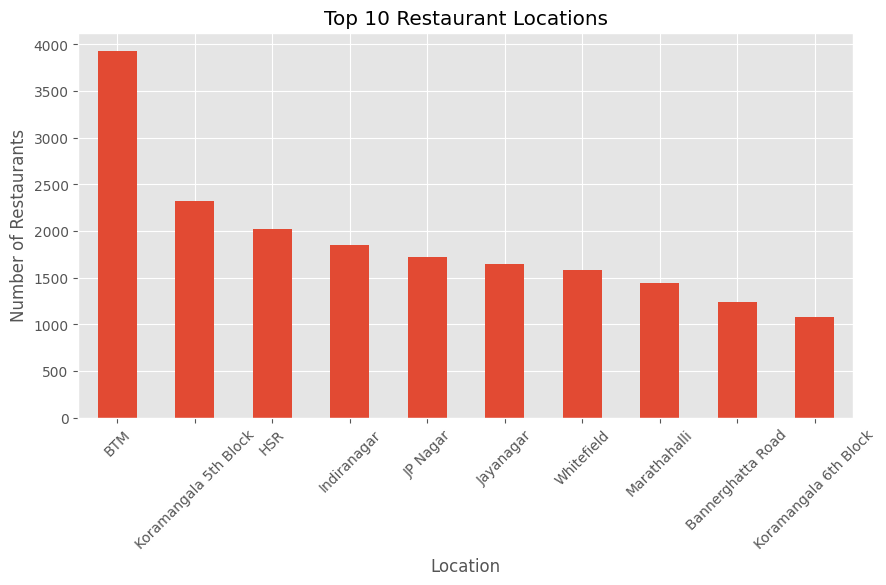

In [13]:
plt.figure(figsize=(10,5))
df['location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Restaurant Locations")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

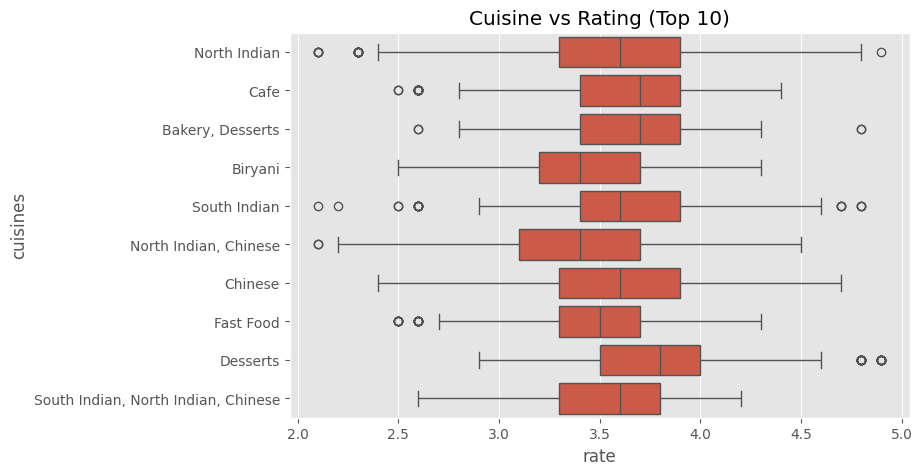

In [14]:
top_cuisines = df['cuisines'].value_counts().head(10).index
filtered_df = df[df['cuisines'].isin(top_cuisines)]

plt.figure(figsize=(8,5))
sns.boxplot(x='rate', y='cuisines', data=filtered_df)
plt.title("Cuisine vs Rating (Top 10)")
plt.show()

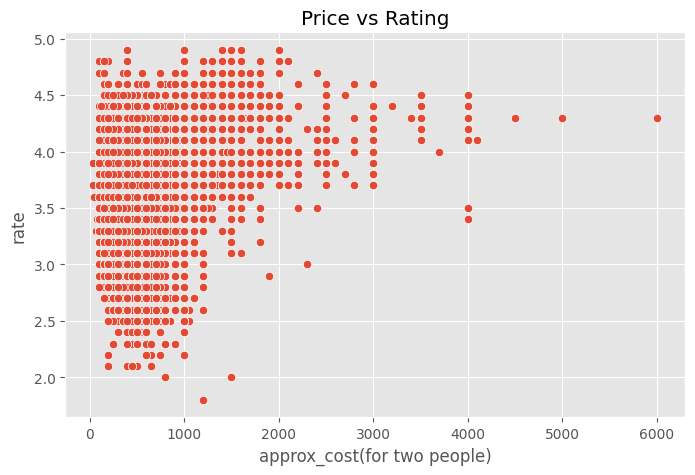

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title("Price vs Rating")
plt.show()

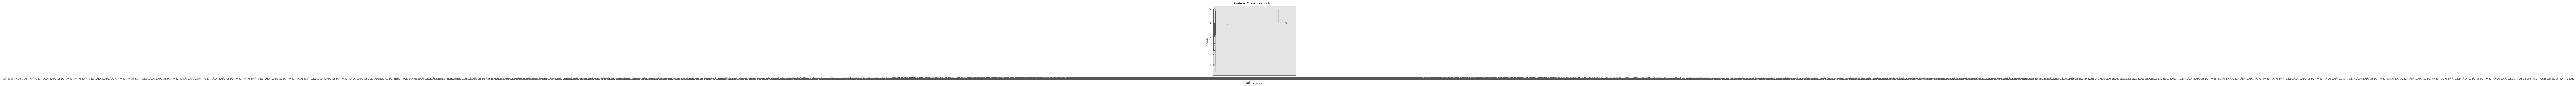

In [16]:
plt.figure(figsize=(6,5))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Online Order vs Rating")
plt.show()

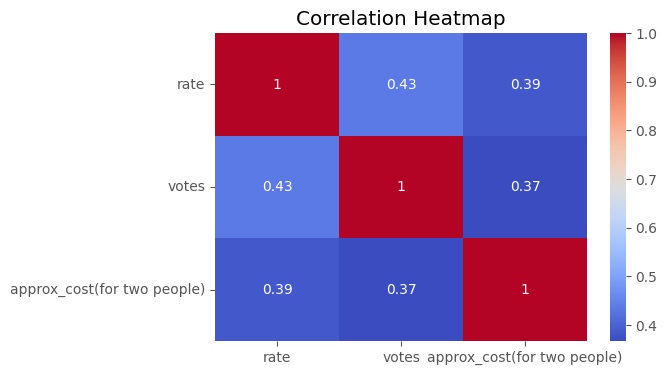

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['rate','votes','approx_cost(for two people)']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

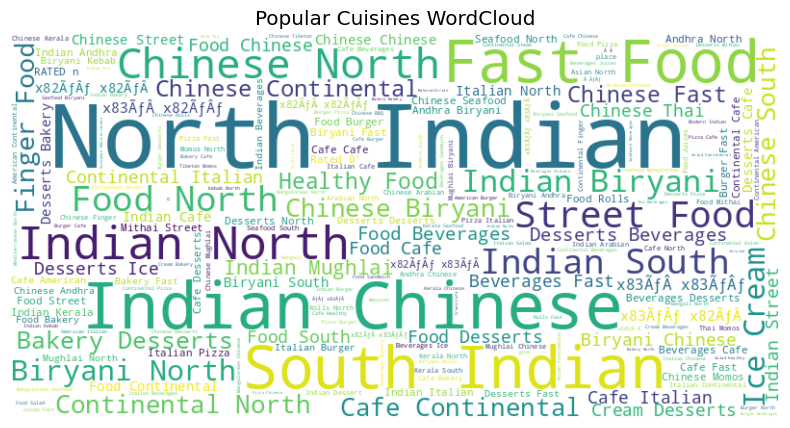

In [18]:
text = " ".join(df['cuisines'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Cuisines WordCloud")
plt.show()